In [1]:
# import essential library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
albumLengDF = pd.read_csv('Top 10 Albums By Year Album Length - Sheet1.csv')
albumTrackDF = pd.read_csv('Top 10 Albums By Year Tracks - Album Length.csv')

# GENERAL EDA

Light Cleaning

In [3]:
# print data rows & features
print(f'albumLengDF\nRows: {albumLengDF.shape[0]} | Features: {albumLengDF.shape[1]}')
print(f'albumTrackDF\nRows: {albumTrackDF.shape[0]} | Features: {albumTrackDF.shape[1]}')

albumLengDF
Rows: 320 | Features: 12
albumTrackDF
Rows: 320 | Features: 9


In [4]:
# print data type
display(albumLengDF.info())
display(albumTrackDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    320 non-null    int64  
 1   Ranking                 320 non-null    int64  
 2   Artist                  320 non-null    object 
 3   Album                   320 non-null    object 
 4   Worldwide Sales (Est.)  320 non-null    object 
 5   CDs                     320 non-null    int64  
 6   Tracks                  320 non-null    int64  
 7   Album Length            320 non-null    object 
 8   Hours                   320 non-null    float64
 9   Minutes                 320 non-null    float64
 10  Seconds                 320 non-null    int64  
 11  Genre                   320 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 30.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    320 non-null    int64 
 1   Ranking                 320 non-null    int64 
 2   Artist                  320 non-null    object
 3   Album                   320 non-null    object
 4   Worldwide Sales (Est.)  320 non-null    object
 5   CDs                     320 non-null    int64 
 6   Tracks                  320 non-null    int64 
 7   Album Length            320 non-null    object
 8   Genre                   320 non-null    object
dtypes: int64(4), object(5)
memory usage: 22.6+ KB


None

In [5]:
# changing collumn name to be more insightfull
albumLengDF = albumLengDF.rename(columns={'Worldwide Sales (Est.)': 'sales'})
albumTrackDF = albumTrackDF.rename(columns={'Worldwide Sales (Est.)': 'sales'})

# specifying features data type
albumLengDF = albumLengDF.astype({
                                  'Artist': 'str',
                                  'Album': 'str',
                                  'CDs': 'int64',
                                  # 'Album Length': 'datetime64[ns]',
                                  # 'Hours': 'datetime64[ns]',
                                  # 'Minutes': 'datetime64[ns]',
                                  # 'Seconds': 'datetime64[ns]',
                                  'Genre': 'category'
                                })
albumLengDF['sales'] = albumLengDF['sales'].replace(',','', regex=True)
albumLengDF['sales'] = pd.to_numeric(albumLengDF['sales'])

# drop album length, hours, minutes features because it is the same as seconds features. Also seconds features its more flexible to be work with
albumLengDF = albumLengDF.drop(['Hours', 'Minutes', 'Album Length'], axis=1)

albumTrackDF = albumTrackDF.astype({
                                    'Artist': 'str',
                                    'Album': 'str',
                                    # 'Album Length': 'datetime64[ns]',
                                    'Genre': 'category'
                                })
albumTrackDF['sales'] = albumTrackDF['sales'].replace(',','', regex=True)
albumTrackDF['sales'] = pd.to_numeric(albumTrackDF['sales'])

#drop album length because its relevant since both dataframe will be merged
albumTrackDF = albumTrackDF.drop(['Album Length'], axis=1)

# merge both dataframe
albumDF = pd.merge(albumLengDF, albumTrackDF)

# Finding Missing Values

In [6]:
import seaborn as sns
import missingno as msno

<AxesSubplot:>

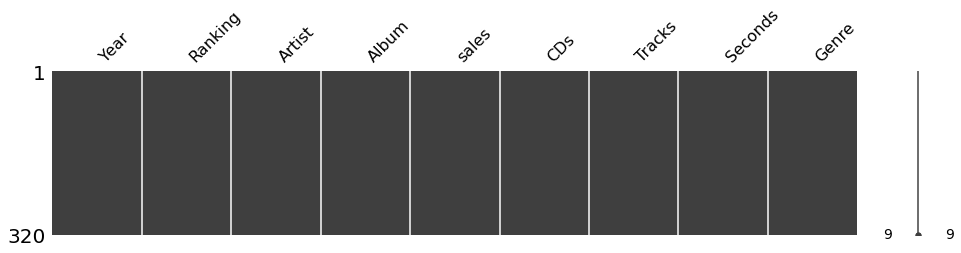

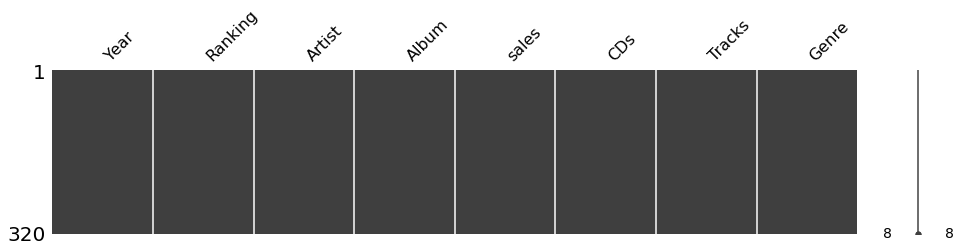

In [7]:
# check album by length
msno.matrix(albumDF, figsize=(16, 3))

# check album by track
msno.matrix(albumTrackDF, figsize=(16, 3))

# Features Distribution

Univariate distribution

In [8]:
def plotUnivariateDistribution(df, features):
    """Plot features in DataFrame with 3 univariate plotting style.

    Args:
        df: DataFrame that want to be plotted.
        features: Collumn in DataFrame that want to be plotted.
    Returns:
        Distribution plot show.
    """
    fig, ax = plt.subplots(1, 3, figsize=(20, 4))

    sns.kdeplot(data=df, x=features, ax=ax[0])
    sns.histplot(data=df, x=features, ax=ax[1])
    sns.ecdfplot(data=df, x=features, ax=ax[2])
    fig.suptitle(str(features) + ' features distribution')

def plotCategoryDistribution(df, features, sort=True, size=(30,5)):
    """Plot categorial features in DataFrame with barplot.

    Args:
        df: DataFrame that want to be plotted.
        features: Collumn in DataFrame that want to be plotted.
        sort: Sort plotting by value count or not (boolean)
    Returns:
        Distribution plot show.
    """
    ax, fig = plt.subplots(figsize=size)
    fig.tick_params(axis='x', rotation=90)

    if sort:
        sns.countplot(data=df, x=features, order=albumLengDF[features].value_counts().index)
    else:
        sns.countplot(data=df, x=features)

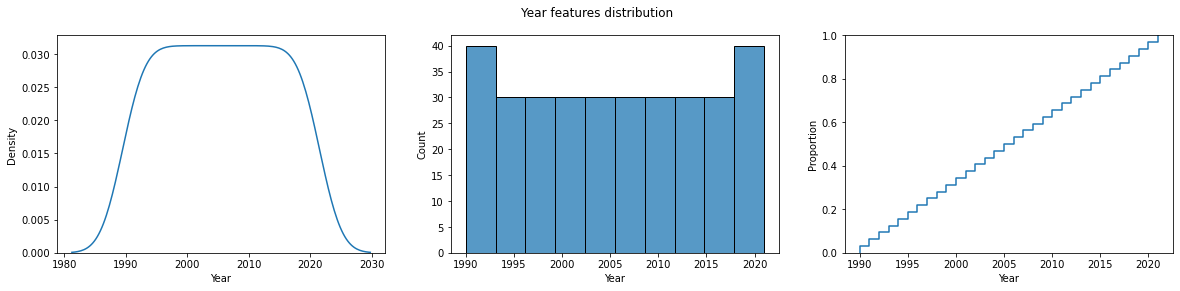

In [9]:
# check album become top 100 by year
plotUnivariateDistribution(albumDF, 'Year')

Conclusion: Ranking features have also uniform distribution, which mean every year always have a fix number of ranking distribution.

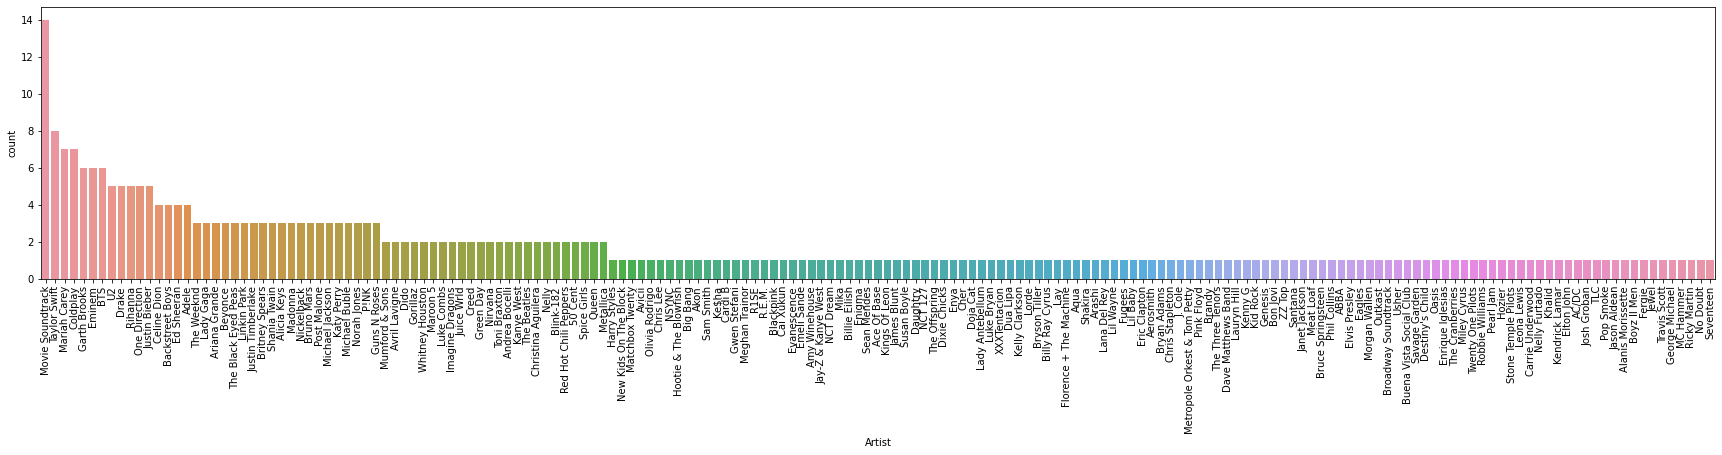

In [10]:
plotCategoryDistribution(albumDF, 'Artist', True)

Conclusion: Artist features show that more than 50% of artist album only had been in chart one time. Every time the same artist album came 2, 3 and couple time the chance of that happening its getting even smaller.

C:\Users\Shivang Rao\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36855 (\N{CJK UNIFIED IDEOGRAPH-8FF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


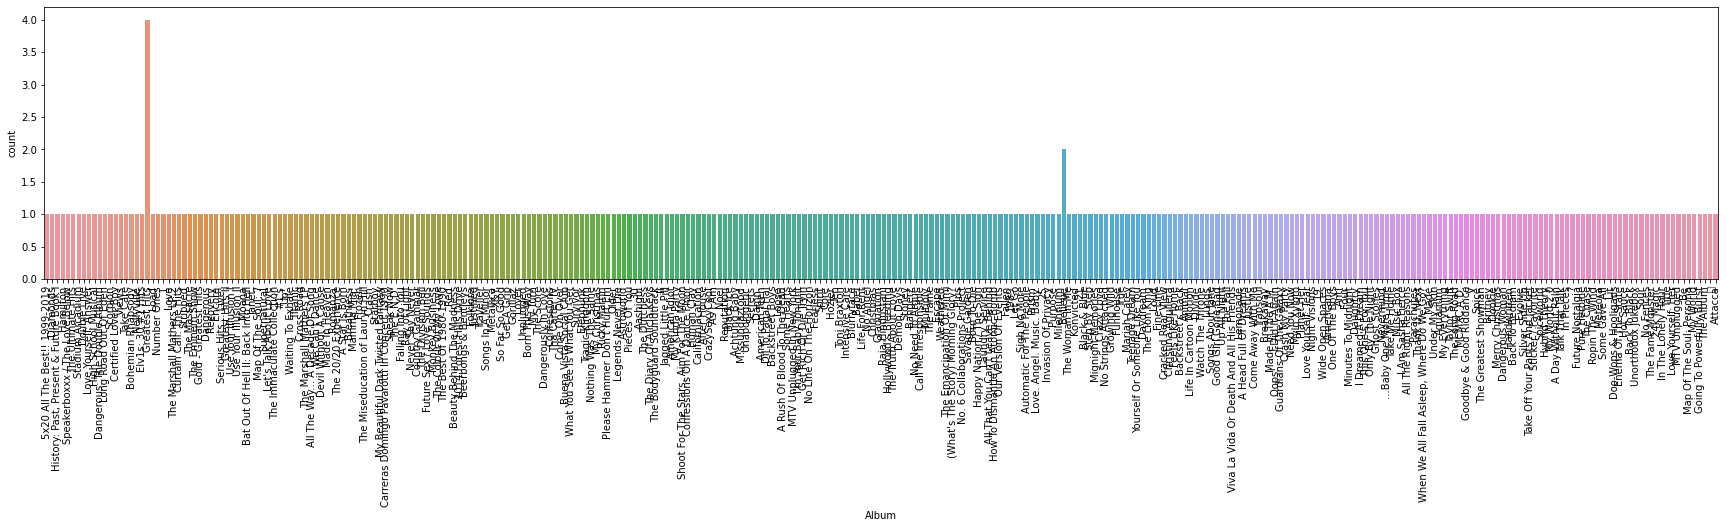

In [11]:
plotCategoryDistribution(albumDF, 'Album', False)

In [12]:
# make dataframe filter which show album name that occured more than 1
albumFilter = albumDF['Album'].map(albumDF['Album'].value_counts() > 1)

# print artist, album, and year
display(albumDF[albumFilter][['Artist', 'Album', 'Year']].sort_values('Year'))

Artist          Album  Year
48                         ZZ Top  Greatest Hits  1992
78   Metropole Orkest & Tom Petty  Greatest Hits  1993
34              Bruce Springsteen  Greatest Hits  1995
242                          Cher        Believe  1998
19                   Guns N Roses  Greatest Hits  2004
195                 Justin Bieber        Believe  2012

Conclusion: Most of the album name only appear once, however there is some outliers album named "Greatest Hits" and "Believe" that have been occured more than once.

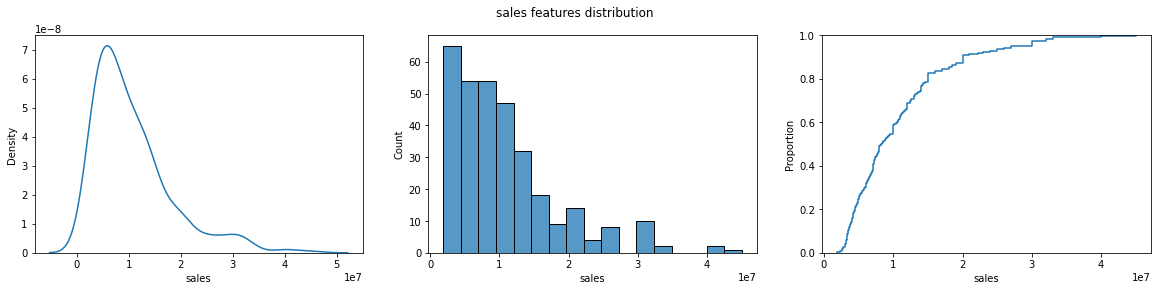

In [13]:
plotUnivariateDistribution(albumDF, 'sales')

Conclusion: sales features have a right-skewed distribution, which mean most of album sales record significantly lower than data maximum value.

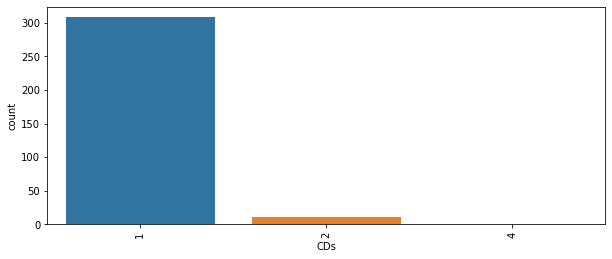

In [14]:
plotCategoryDistribution(albumDF, 'CDs', size=(10,4))

Conclusion: Majority of CDs data only contain 1 CD and there is only a small number which contain 2 and 4 CD.

count    320.000000
mean      14.306250
std        5.868995
min        6.000000
25%       12.000000
50%       13.000000
75%       15.000000
max       67.000000
Name: Tracks, dtype: float64


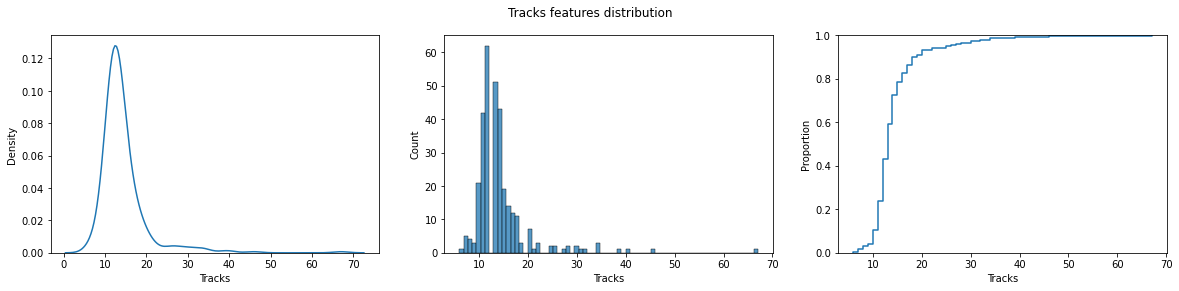

In [16]:
plotUnivariateDistribution(albumDF, 'Tracks')
print(albumDF['Tracks'].describe())

Conclusion: Tracks features have right skewed distribution, this features may have outliers because the maximum value its quite far away from the mean value or around 9x standard deviation.

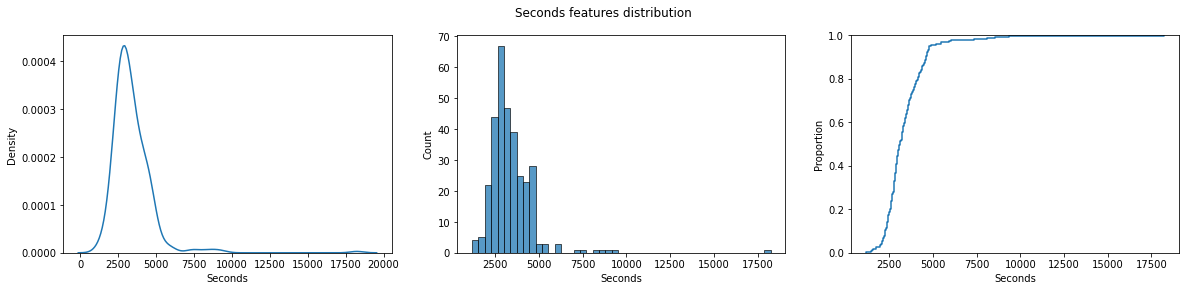

In [17]:
plotUnivariateDistribution(albumDF, 'Seconds')

Conclusion: Album length (by seconds) have right skewed distribution, most of the data have length between 1000 - 5000 seconds. Then some of outliers can have length almost 20000 seconds in 1 album.

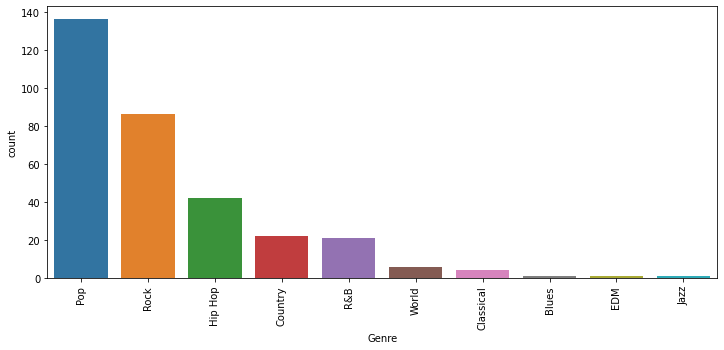

In [18]:
plotCategoryDistribution(albumDF, 'Genre', size=(12,5))

In [19]:
# print normalized value count 
display(albumDF['Genre'].value_counts(normalize=True).sort_values(ascending=False))

Pop          0.425000
Rock         0.268750
Hip Hop      0.131250
Country      0.068750
R&B          0.065625
World        0.018750
Classical    0.012500
Blues        0.003125
EDM          0.003125
Jazz         0.003125
Name: Genre, dtype: float64

Conclusion: Around 42% of dataset album have "Pop" category, this can indicate that Pop song can have bigger chance to become popular album

# Bivariate Relationship

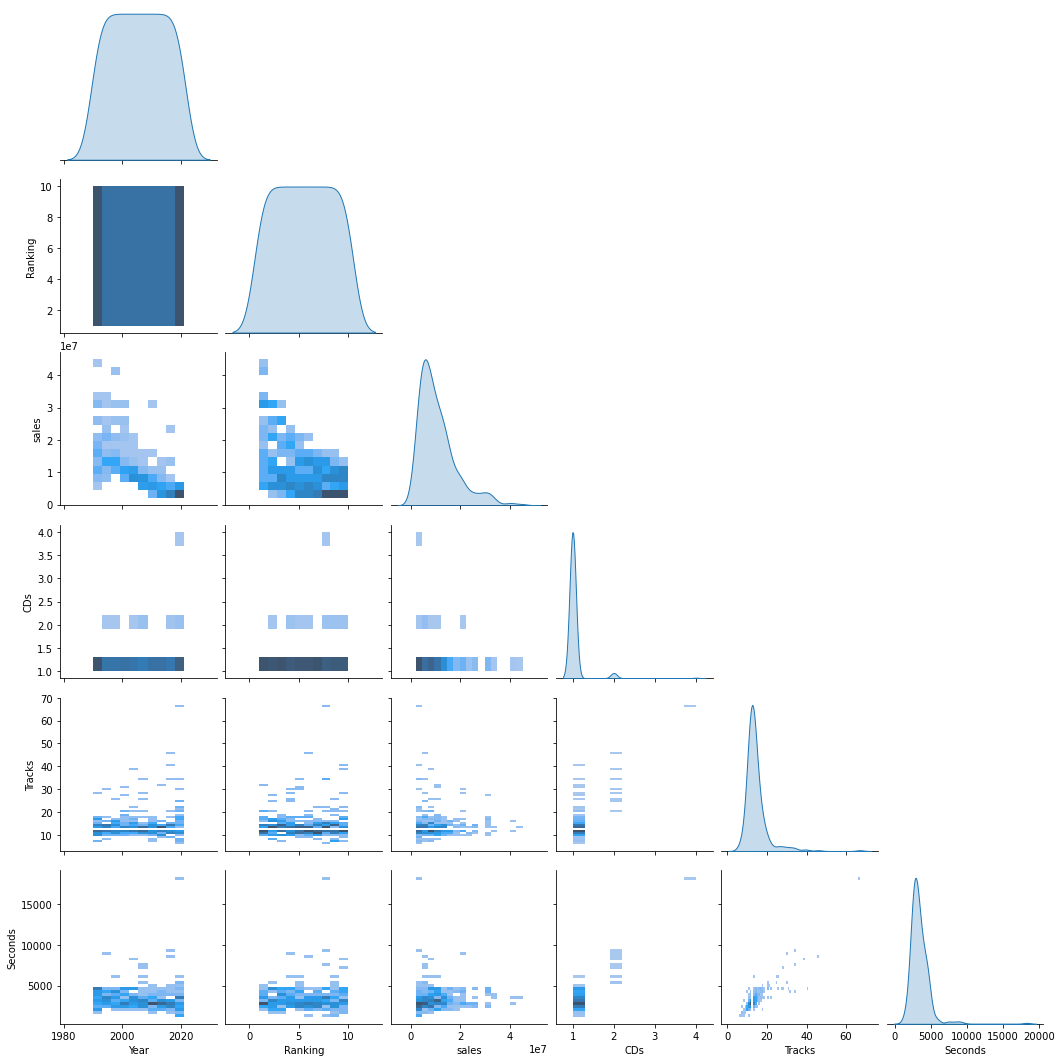

In [20]:
sns.pairplot(albumDF, kind='hist', diag_kind='kde', corner=True)

Conclusion

Sales tend to be lower in recent year compare to the 90s or early 2000. (Year x Sales)

Track (y axis) bivariate relationship, there is album that contain almost 70 track, that may cause skewed distribution.

In seconds (y axis) bivariate relationship, almost all the time there is some album that have a lot of seconds that caused some outliers in every relationship.

At CDs (y axis) there is some album that have 4 cd that may considered as an outliers.

Seconds x Track may have some positive correlation.

# Outliers cleaning

In [21]:
def cleanOutlier(df, features, threshold=1.5):
    """Clean outlier in DataFrame.
        args:
            df: DataFrame that want to be cleaned.
            features: Collumn in DataFrame that want to be cleaned.
            threshold: Threshold to determine outlier.
        returns:
            DataFrame without outlier.
    """
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    UB = Q3 + threshold * IQR
    LB = Q3 - threshold * IQR
    df = df.loc[(df[features] > LB) & (df[features] < UB)]

    return df

<AxesSubplot:xlabel='Seconds'>

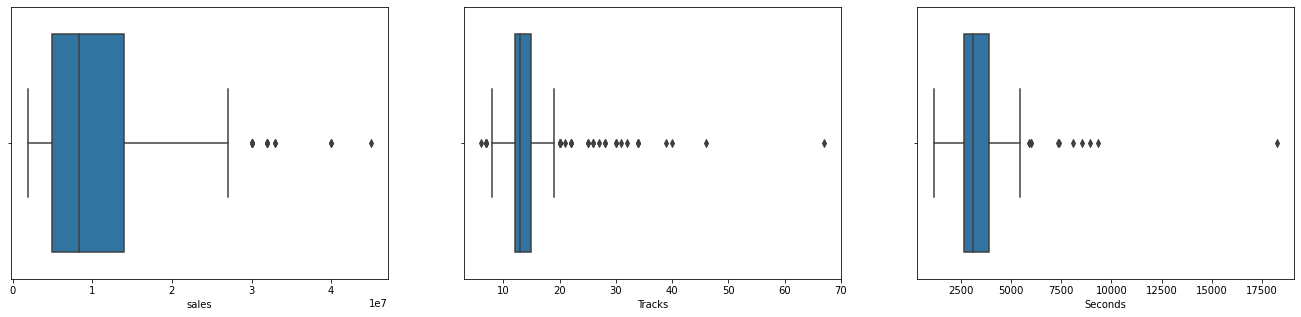

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(23, 5))
sns.boxplot(data=albumDF, x='sales', ax=ax[0])
sns.boxplot(data=albumDF, x='Tracks', ax=ax[1])
sns.boxplot(data=albumDF, x='Seconds', ax=ax[2])

In [23]:
# remove cd above 2
albumDF = albumDF[albumDF['CDs'] < 3]

albumDF = cleanOutlier(albumDF, 'sales', threshold=3)
albumDF = cleanOutlier(albumDF, 'Tracks', threshold=2)
albumDF = cleanOutlier(albumDF, 'Seconds', threshold=3)

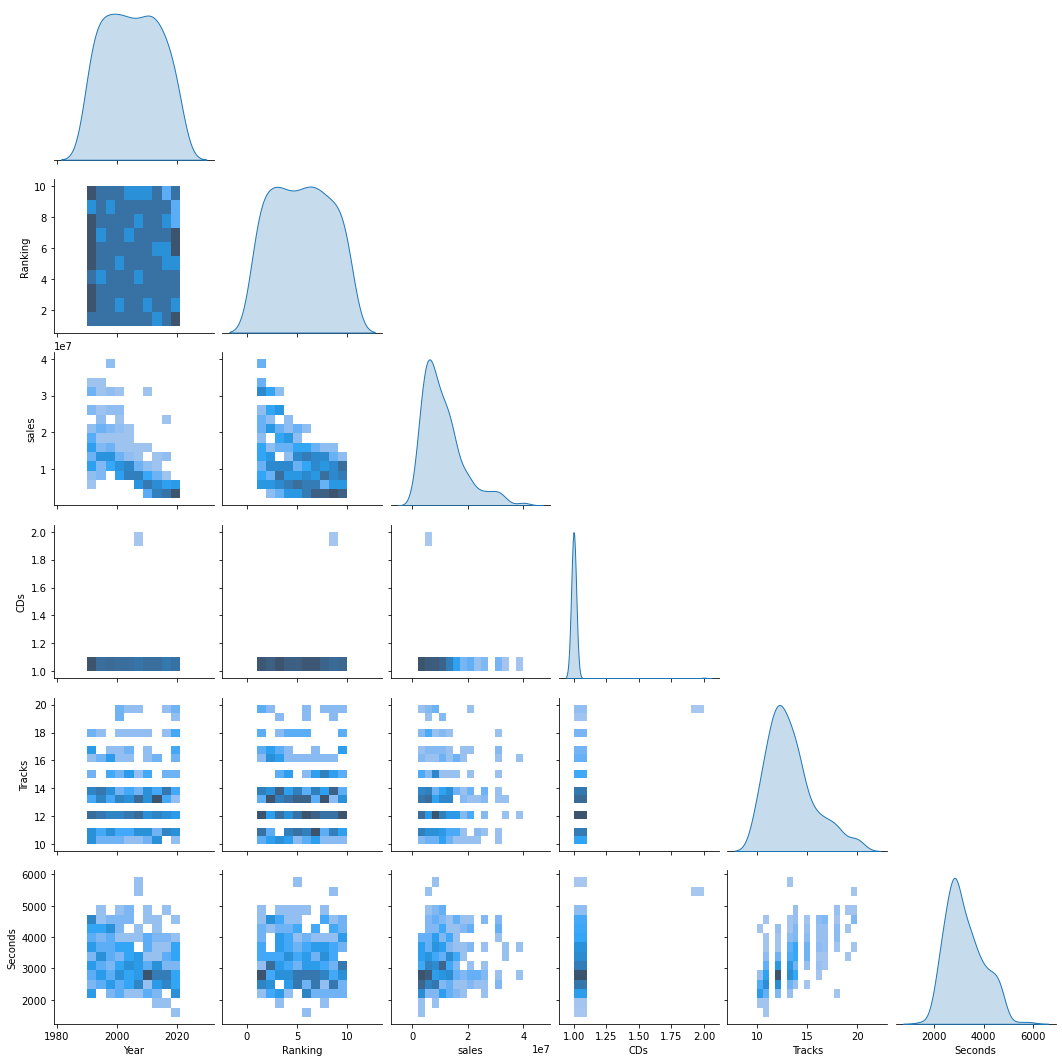

In [24]:
sns.pairplot(albumDF, kind='hist', diag_kind='kde', corner=True)

# Correlation Heatmap

<AxesSubplot:>

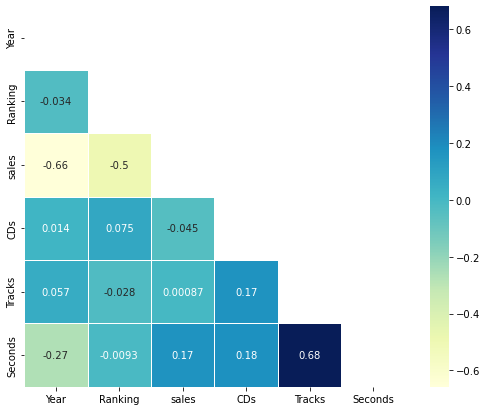

In [25]:
# make triangle mask
mask = np.triu(np.ones_like(albumDF.corr(), dtype=bool))

plt.figure(figsize=(9, 7))
sns.heatmap(data=albumDF.corr(), annot=True, cmap='YlGnBu', linewidths=0.5, mask=mask, square=True)

Conclusion

Year & sales have strong negative correlation

Ranking & sales have moderate negative correlation

Tracks & Seconds have strong positive correlation

Year & seconds have weak negative correlation

# Scatter Plot

In [26]:
import plotly.express as px 

fig = px.scatter(albumDF, x='Year', y='sales', size='Seconds', color='Tracks')
fig.update_layout(title='Album Length by Year')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Ranking'>

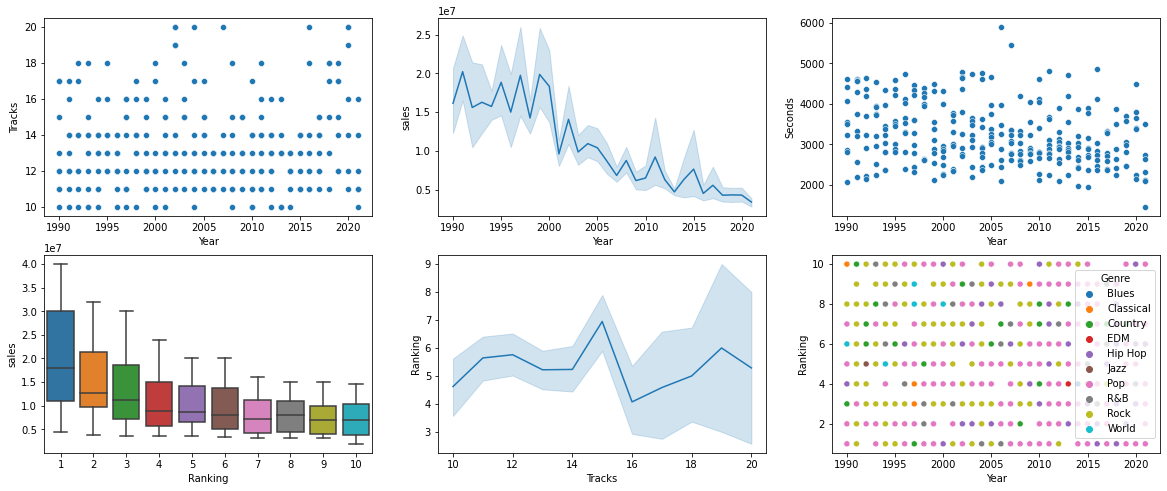

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))
sns.color_palette("pastel")

sns.scatterplot(data=albumDF, x='Year', y='Tracks', ax=ax[0, 0])
sns.lineplot(data=albumDF, x='Year', y='sales', ax=ax[0, 1])
sns.scatterplot(data=albumDF, x='Year', y='Seconds', ax=ax[0, 2])

sns.boxplot(data=albumDF, x='Ranking', y='sales', ax=ax[1,0])
sns.lineplot(data=albumDF, x='Tracks', y='Ranking', ax=ax[1,1])
sns.scatterplot(data=albumDF, x='Year', y='Ranking', hue='Genre')

Conclusion: Through previous plot we can see that there isn't a clear pattern in the data except for sales & year relationship. Average album nowadays is achieving less sales compared to previous generation like 90s and early 2000. There is no clear pattern for track & seconds features, however there is some less data density in the longer Seconds features in 2010 - 2020 than previous generation.

In [28]:
fig = px.scatter_3d(albumDF, x='Year', y='sales', z='Tracks', color='Seconds', size='Seconds')
fig.update_layout(title='Album Length by Year')
fig.show()

Conclusion through this 3D plotting we can see that there is area that quite dense and others that didn't contain to many data point. Usually it can be suspected as outlier, but the distance between that point and the one with the dense area isn't too far, so it maybe useful for later model clustering.

# Features Engineering

Pre-processing the dataset

In [29]:
# encode genre to numeric sort by biggest value count
genreParam = {
    'Pop': 0, 'Rock': 1, 'Hip Hop': 2, 'R&B': 3, 'Country': 4,
    'World': 5, 'Classical': 6, 'Blues': 7, 'EDM': 8, 'Jazz': 9
}
albumDF['Genre'] = albumDF['Genre'].map(genreParam)

In [30]:
# dropping Artist & Album collumn since there is no NLP
albumDF = albumDF.drop(['Artist', 'Album'], axis=1)

# make pipeline for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

pipeline = Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=3))])

# fit and transform data
albumStandarizedDF = pipeline.fit_transform(albumDF)

# Model Selection

C:\Users\Shivang Rao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Shivang Rao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Shivang Rao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Shivang Rao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when the

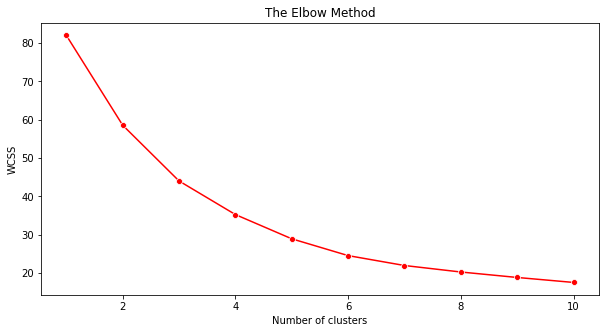

In [31]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(albumStandarizedDF)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Conclusion: from the elbow method we can see the line start flatting out by the end of 4 cluster. So we can use simple KMeans clustering with 4 cluster parameter.

In [33]:
# simplify variable name into X
X = albumStandarizedDF

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)

C:\Users\Shivang Rao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [34]:
import plotly.graph_objs as go

trace = go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode='markers', marker=dict(color=y_means, size=6, line=dict(color=y_means, width=12), opacity=0.8))
data = [trace]
fig = go.Figure(data= data)
fig.show()